In [18]:
import sys

import numpy as np
import tensorflow as tf
from keras import layers, models
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio
import cartopy.crs as ccrs

from scipy import signal

In [12]:

# Carica i file .mat
#data = sio.loadmat('U1_S1_M1load.mat')
#U1 = Utente 1
#U2 = Utente 2
#S1 = Strada 1 (dissestata)
#S2 = Strada 2 (liscia)
#M1 = Monopattino 1 (sano)
#M2 = Monopattino 2 (danneggiato)
inDataConstrainSize = 63000
Accelerations = np.zeros((2,2,2,inDataConstrainSize,4))

for u in range(1,3):
    for s in range(1,3):
        for m in range(1,3):
            fileName = 'U'+str(u) +'_S'+ str(s)+ '_M'+ str(m)+'load.mat'
            #print(name+' loaded')
            
            data = sio.loadmat(fileName)
            Acceleration = data['acceleration']
            
            print(fileName+' size: '+str(data['acceleration'].shape[0]))
            
            Accelerations[u-1,s-1,m-1,:,:] = Acceleration[:63000,:]

#print(data.keys())
#Acceleration = data['acceleration']
#print(data['acceleration'].shape)
#print(Acceleration[3])


U1_S1_M1load.mat size: 63948
U1_S1_M2load.mat size: 63123
U1_S2_M1load.mat size: 64681
U1_S2_M2load.mat size: 64007
U2_S1_M1load.mat size: 64620
U2_S1_M2load.mat size: 64577
U2_S2_M1load.mat size: 63102
U2_S2_M2load.mat size: 63660


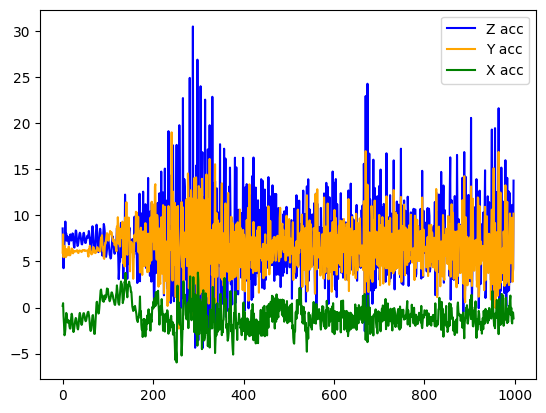

In [37]:

Acceleration = data['acceleration']
span = 499
current = 1
start = current * span
stop = (current+1) * span

#timestamp = np.squeeze(Acceleration[:stop,0])
acc_x = np.squeeze(Acceleration[:stop,1])
acc_y = np.squeeze(Acceleration[:stop,2])
acc_z = np.squeeze(Acceleration[:stop,3])


plt.plot( acc_z, label='Z acc', color='blue')
plt.plot( acc_y, label='Y acc', color='orange')
plt.plot( acc_x, label='X acc', color='green')
plt.legend()


In [ ]:
##test welch

rng = np.random.default_rng()
fs = 10e2
N = 500
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += rng.normal(scale=np.sqrt(noise_power), size=time.shape)

plt.plot(x)
f, Pxx_den = signal.welch(x, fs, nperseg=2048)
plt.figure()
plt.semilogy(f, Pxx_den, color = 'Red')

plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
#plt.show()
print(len(f))

C:\Users\ciosepp\AppData\Roaming\Python\Python312\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1024 is greater than input length  = 998, using nperseg = 998
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Text(0.5, 1.0, 'Z')

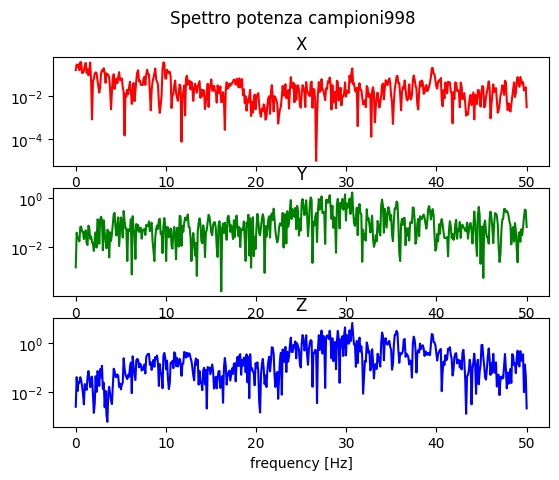

In [38]:
fs = 100
f, Pxacc = signal.welch(acc_x, fs, nperseg=1024)
f, Pyacc = signal.welch(acc_y, fs, nperseg=1024)
f, Pzacc = signal.welch(acc_z, fs, nperseg=1024)
'''
plt.semilogy(f, Pxacc, color = 'Red')
plt.semilogy(f, Pyacc, color = 'green')
plt.semilogy(f, Pzacc, color = 'blue')
'''
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Spettro potenza campioni'+str(stop))
ax1.semilogy(f, Pxacc, color = 'Red')
ax1.set_title('X')
plt.xlabel('frequency [Hz]')
ax2.semilogy(f, Pyacc, color = 'green')
ax2.set_title('Y')
ax3.semilogy(f, Pzacc, color = 'blue')
ax3.set_title('Z')


In [85]:
#creazione dataset di elaborazione
percentAcqTrain = 60 # %
nSamples = 256
fs = 100
trainData=[]
trainDataMeta=[]
nPackets = int(inDataConstrainSize*percentAcqTrain/int(nSamples)/100)

print('nPackets'+string(nPackets))
print(nPackets*2)
for u in range(0,2):
	for i in range(0, nPackets):
		acqPower= []
		for j in range(3): # X Y Z
		
			acc = Accelerations[u, 0, 0, i*nSamples:nSamples*(i+1), j+1]
			
			f, Pacc = signal.welch(acc, fs, nperseg=256)   
			acqPower = np.append(acqPower, Pacc)

		trainDataMeta.append(acqPower)
	trainData.append(trainDataMeta)
trainOut = np.hstack(trainData)

NameError: name 'string' is not defined

In [78]:
matrici = []

# Ciclo che genera le matrici e le aggiunge alla lista
for i in range(5):  # Esempio con 5 matrici, puoi cambiare questo valore
    matrice = np.random.rand(100, 20)  # Genera una matrice 100x20
    matrici.append(matrice)  # Aggiungi la matrice alla lista

# Concatenazione di tutte le matrici lungo le colonne
matrice_concatenata = np.hstack(matrici)

print(matrice_concatenata.shape) 

(100, 100)
